<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio Estadistica Descriptiva

⚠️ Siempre que puedas usa graficas para apoyar tu interpretacion


In [153]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np  
import pandas as pd 


# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
# generar rejilla de subplots
import matplotlib.gridspec as gridspec


# librerias para estadisticas 
# ------------------------------------------------------------------------------

import statistics as st 
from scipy import stats  
from scipy.stats import skew,kurtosis # libreria para asimetria y curtosis 




#### Ejercicio 1: 

1.  Dados los siguientes datos: [15, 21, 25, 32, 35, 45, 50, 50, 55, 60]. Crea una funcion que calcule la media, mediana y moda.


In [87]:
datos = [15, 21, 25, 32, 35, 45, 50, 50, 55, 60]

Sin utlizar numpy:

In [88]:
from collections import Counter

def calcular_media(lista_num):
    return sum(lista_num)/len(lista_num)

def calcular_mediana(lista_num):
    lista_num.sort()
    if len(lista_num) % 2 == 0:
        medium_index_left = int(len(lista_num) / 2) - 1
        mediana = (lista_num[medium_index_left] + lista_num[medium_index_left + 1]) / 2
        return mediana
    else:
        mediana = int(len(lista_num) / 2 )
        return mediana

def calcular_moda(lista_num):
    return Counter(lista_num).most_common(1)[0][0]

In [89]:
calcular_moda(datos)

50

2.	Interpretación de la media: ¿Qué sucede si un valor extremo, como 100, se agrega al conjunto de datos anterior? ¿Cómo cambia la media? Explica por qué sucede esto.

Si un valor extremo como 100 se incluyera en la lista, la media se desplazaría hacia la derecha. Esto sucede porque la media se computa como el sumatorio de todos los valores de la muestra entre el número de elementos de la misma. Para un pequeño aumento del tamaño muestral, habría un aumento proporcionalmente mayor del sumatorio, inflando la media.

In [103]:
datos_con_extremo = datos + [100]
print(f"La media sin el dato extremo es {calcular_media(datos)} VS {round(calcular_media(datos_con_extremo),2)} con el dato extremo")

La media sin el dato extremo es 38.8 VS 44.36 con el dato extremo


En el gráfico inferior se observa como la función de densidad estimada se desplaza a la derecha cuando se introduce el valor extremo.

<Axes: ylabel='Count'>

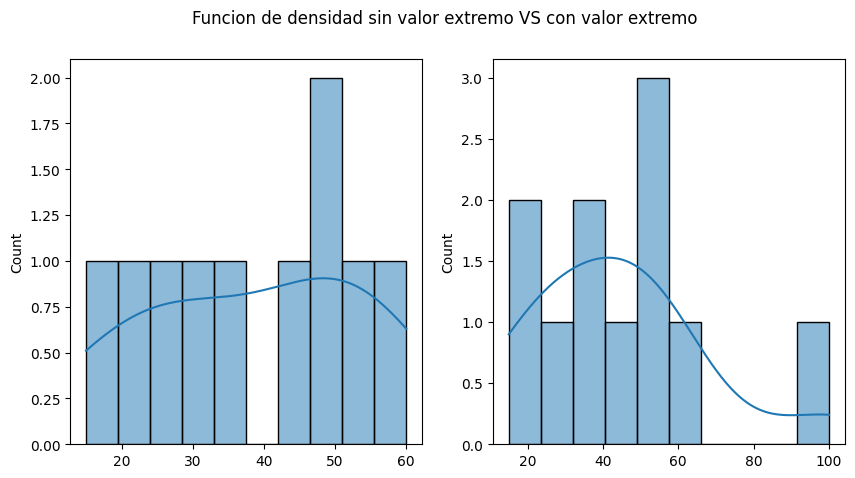

In [105]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
plt.suptitle("Funcion de densidad sin valor extremo VS con valor extremo")
sns.histplot(datos, bins=10, kde=True, ax=ax[0])
sns.histplot(datos_con_extremo, bins=10, kde=True, ax=ax[1])


#### Ejercicio 2: 
1. **Cálculo de la varianza y desviación estándar**: Usando los mismos datos de arriba, calcula la **varianza** y la **desviación estándar**.




In [68]:
# tu codigo aqui
def desviacion_estandar(lista_num):
    media = calcular_media(lista_num)
    return (sum([(num - media)**2 for num in lista_num]) / len(lista_num))**0.5

def varianza(lista_num):
    return desviacion_estandar(lista_num)**2

In [71]:
desviacion_estandar(datos)

14.613692209705253

2. **Comparación de dispersión**: Dado otro conjunto de datos: `[18, 19, 20, 22, 24, 25, 27, 30]`, compara la **dispersión** de este grupo con el conjunto de datos anterior (del Ejercicio 1) calculando la **desviación estándar** de ambos. ¿Qué conjunto tiene mayor dispersión?

In [72]:
datos_2 = [18, 19, 20, 22, 24, 25, 27, 30]

In [73]:
desviacion_estandar(datos_2)

3.887077951366553

<Axes: >

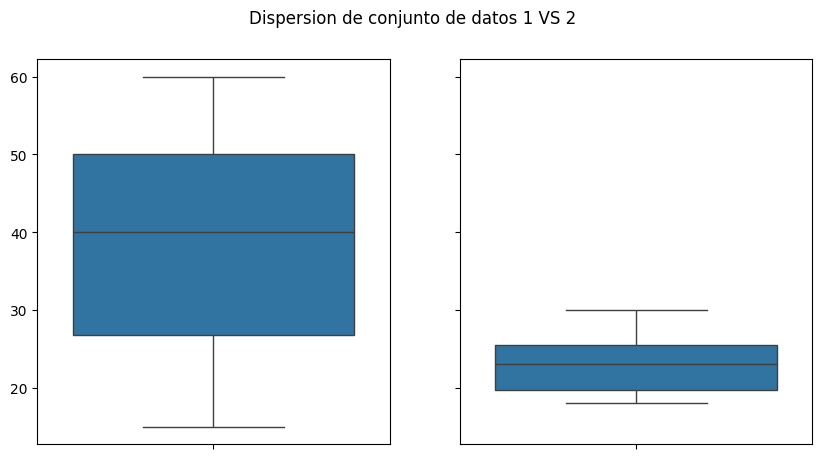

In [110]:
fig, ax = plt.subplots(1,2,figsize=(10,5), sharey=True)
plt.suptitle("Dispersion de conjunto de datos 1 VS 2")
sns.boxplot(datos, ax=ax[0])
sns.boxplot(datos_2, ax=ax[1])

El primer conjunto tiene con diferencia mayor desviación estándar y por lo tanto mayor dispersión.

#### Ejercicio 3:

1. Usa la función correspondiente en Python para calcular la **asimetría** del conjunto de datos: `[10, 20, 20, 20, 25, 30, 35, 40]`. 


In [111]:
# tu codigo aqui
asymmetry_data = [10, 20, 20, 20, 25, 30, 35, 40]
skew(asymmetry_data)

np.float64(0.1280077375904375)

<Axes: ylabel='Count'>

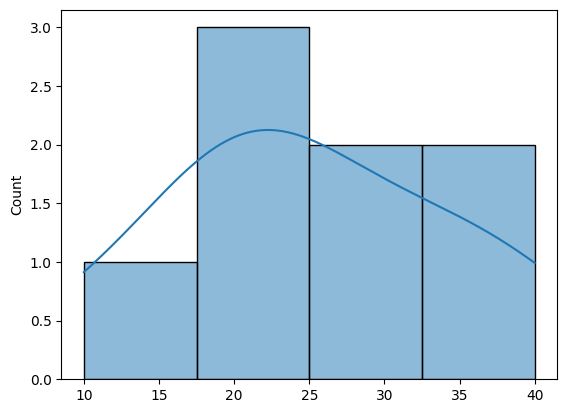

In [113]:
sns.histplot(asymmetry_data, kde=True)

2. Interpreta el resultado: ¿El conjunto es simétrico, sesgado a la izquierda o a la derecha?

El conjunto está ligeramente sesgado hacia la derecha, según indican su coeficiente de asimetría y su cola ligeramente orientada hacia la derecha.

#### Ejercicio 4: 

1. Calcula la **curtosis** para el conjunto de datos: `[5, 5, 5, 20, 25, 30, 30, 50]`. 

In [ ]:
# tu codigo aqui
kurtosis_data =[5, 5, 5, 20, 25, 30, 30, 50]
kurtosis(kurtosis_data)

np.float64(-0.7357817008166658)

<Axes: ylabel='Count'>

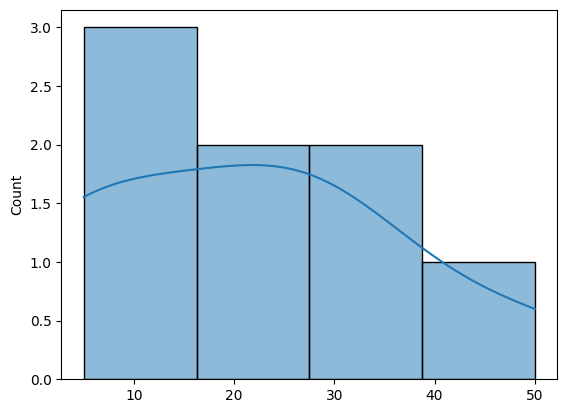

In [115]:
sns.histplot(kurtosis_data, kde=True)

2. ¿El conjunto tiene una curtosis positiva, negativa o es mesocúrtico? Explica qué implica esto sobre la forma de la distribución.

Según el coeficiente de curtosis y el histograma, la distribucion es platicurtica. Esto implica que los datos tienen mayor dispersión y que no están tan concentrados hacia el centro de la distribución.

#### Ejercicio 5: Caso practico. 


Imagina que una empresa está evaluando el rendimiento de sus empleados para entender la relación entre el tiempo que dedican a su trabajo y el éxito que tienen en términos de ventas. La empresa recopila datos durante un mes, midiendo cuántas **horas trabajó** cada empleado y cuántas **ventas realizaron**. Estos datosa se encuentran en el archivo `rendimiento.csv`

**Horas trabajadas**: 
   - Se midieron las horas trabajadas por un grupo de empleados. En general, la mayoría de los empleados trabajan entre 40 y 60 horas a la semana, con algunos empleados trabajando un poco menos o más.


**Ventas realizadas**:
   - A cada empleado también se le hizo un seguimiento de cuántas ventas realizó. Aunque las ventas están influenciadas por las horas trabajadas, hay cierta **variabilidad**: algunos empleados pueden ser más productivos y vender más en menos tiempo, mientras que otros necesitan trabajar más para alcanzar los mismos resultados.


Resuelve los siguientes puntos:



1. **Cálculo de la media, mediana y moda**:
   - Calcula la **media**, **mediana** y **moda** de las columnas **Horas Trabajadas** y **Ventas Realizadas**.
   - Explica qué información proporciona cada medida en este contexto. Justifica tus conclusiones con representación de graficas. 


In [128]:
# tu codigo aqui
rendimiento = pd.read_csv("../datos/rendimiento.csv")

Para ambas mediciones, Horas y Ventas, la media es muy representativa, prácticamente coincidiendo con la mediana. En el caso de Ventas realizadas, a juzgar por la ligera desviación de la media hacia la derecha, si que parece haber algún empleado que desvía ligeramente la medida al vender un poco más, aunque es casi despreciable. Las ventas también presentan ligeramente más rango y desviación típica.

In [118]:
rendimiento.describe()

,ID,Horas Trabajadas,Ventas Realizadas
count,100.000000,100.000000,100.000000
mean,50.500000,48.961535,49.120000
std,29.011492,9.081684,9.646562
min,1.000000,23.802549,25.000000
25%,25.750000,43.990943,43.000000
50%,50.500000,48.730437,48.000000
75%,75.250000,54.059521,54.250000
max,100.000000,68.522782,75.000000


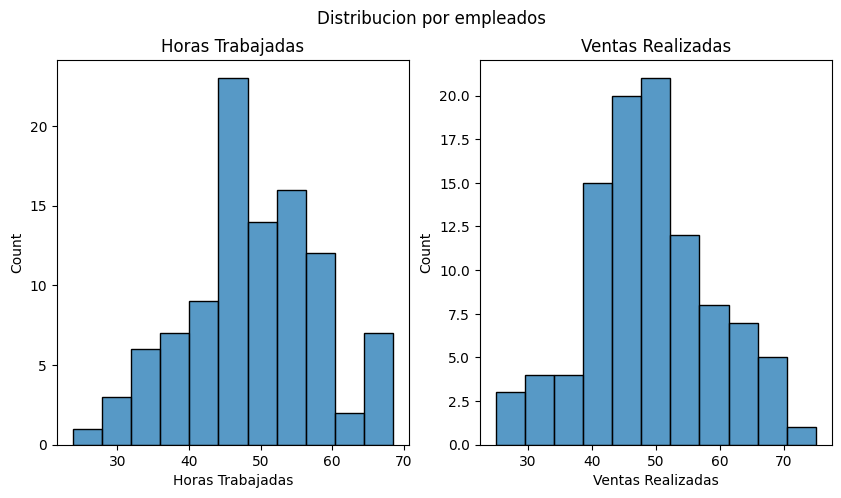

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax_flat = ax.flat

plt.suptitle("Distribucion de horas y ventas por empleado")
for column, ax in zip(["Horas Trabajadas","Ventas Realizadas"],ax_flat):
    ax.set_title(column)
    sns.histplot(data=rendimiento[column], ax=ax)

En los histogramas no se consigue apreciar, sin embargo en los boxplots si que se ve, probablemente debido a un único valor, que las Ventas Realizadas tienen algo más de rango. Por otro lado, se confirma que las distribuciones son prácticamente idénticas.

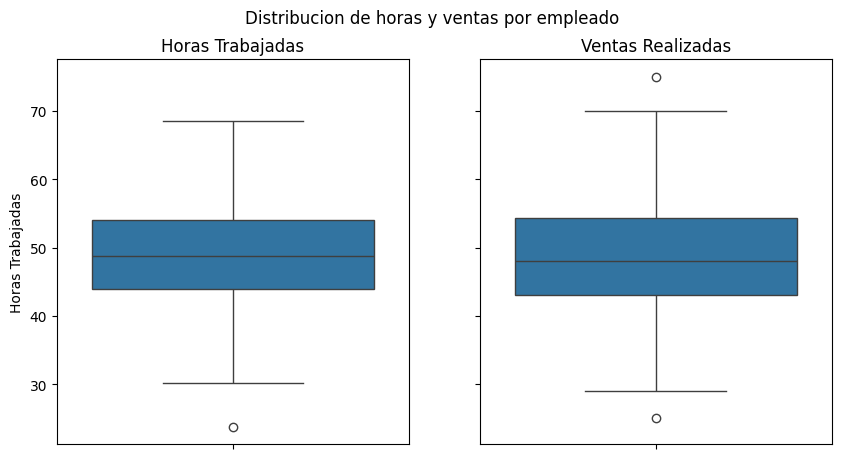

In [131]:
fig, ax = plt.subplots(1,2,figsize=(10,5), sharey=True)
ax_flat = ax.flat

plt.suptitle("Distribucion de horas y ventas por empleado")
for column, ax in zip(["Horas Trabajadas","Ventas Realizadas"],ax_flat):
    ax.set_title(column)
    sns.boxplot(data=rendimiento[column], ax=ax)

Finalmente, calcular la moda puede tener sentido para las ventas realizadas, ya que son un valor numérico discreto. En este caso, el valor más frecuente es 47, que está ligeramente por debajo de la mediana. En el caso de las horas trabajadas, donde los valores con continuos, esta medida no tiene utilidad ya que todos los valores son únicos.

In [157]:
rendimiento.mode()

,ID,Horas Trabajadas,Ventas Realizadas
0,1,23.802549,47.0
1,2,30.124311,NaN
2,3,30.403299,NaN
3,4,30.867198,NaN
4,5,32.369598,NaN
...,...,...,...
95,96,65.230299,NaN
96,97,65.380366,NaN
97,98,65.646437,NaN
98,99,65.792128,NaN



2. **Comparación de medidas de centralización**:
   - ¿Cómo se diferencian la media y la mediana para los datos de **Ventas Realizadas**? ¿Qué indica esta diferencia sobre la distribución de las ventas?


Como se ha comentado arriba, esto indica que pocos empleados ciertos empleados que venden mucho más que los demás.

3. **Cálculo de la varianza y desviación estándar**:
   - Calcula la **varianza** y la **desviación estándar** para las columnas **Horas Trabajadas** y **Ventas Realizadas**.
   - ¿Qué conjunto de datos es más disperso? Explica el significado de la dispersión en este caso. Justifica tus conclusiones con representación de graficas. 


In [133]:
rendimiento.describe()

,ID,Horas Trabajadas,Ventas Realizadas
count,100.000000,100.000000,100.000000
mean,50.500000,48.961535,49.120000
std,29.011492,9.081684,9.646562
min,1.000000,23.802549,25.000000
25%,25.750000,43.990943,43.000000
50%,50.500000,48.730437,48.000000
75%,75.250000,54.059521,54.250000
max,100.000000,68.522782,75.000000


Como se comentaba arriba, el conjunto de Ventas Realizadas presenta mayor dispersión. Este presenta mayor desviación estándar y mayor rango absoluto. En el caso del rango, parece haber un individuo atípico que sesga la medida teniendo muchas más medidas de las demás.

4. **Rango y rango intercuartílico**:
   - Calcula el **rango** y el **rango intercuartílico** para ambas columnas. 
   - ¿Qué te dice esto sobre la variabilidad de los datos? Justifica tus conclusiones con representación de graficas. 

In [137]:
rendimiento.describe().T.assign(rango=lambda x: x["max"]- x["min"],IQR=lambda x: x["75%"]- x["25%"])[["rango","IQR"]]

,rango,IQR
ID,99.000000,49.500000
Horas Trabajadas,44.720233,10.068577
Ventas Realizadas,50.000000,11.250000


El rango intercuartilico es más amplio para las Ventas Realizadas que para las horas, así como el rango completo, indicando que hay más variabilidad en los resultados de los empleados en cuanto a ventas que en la cantidad de tiempo que trabajan.

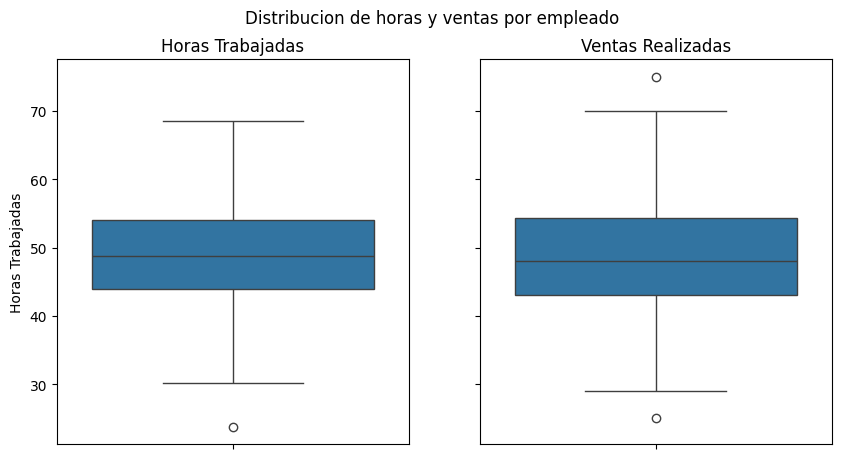

In [138]:
fig, ax = plt.subplots(1,2,figsize=(10,5), sharey=True)
ax_flat = ax.flat

plt.suptitle("Distribucion de horas y ventas por empleado")
for column, ax in zip(["Horas Trabajadas","Ventas Realizadas"],ax_flat):
    ax.set_title(column)
    sns.boxplot(data=rendimiento[column], ax=ax)

5. **Cálculo de la asimetría**:
   - Usa la función adecuada en Python para calcular la **asimetría** de los datos de **Horas Trabajadas** y **Ventas Realizadas**. 
   - Interpreta si el conjunto de datos es **simétrico**, **sesgado a la izquierda** o **sesgado a la derecha**.

In [142]:
rendimiento.skew()

ID                   0.000000
Horas Trabajadas    -0.177948
Ventas Realizadas    0.184165
dtype: float64

Ambas distribuciones son altamente simétricas a juzgar por el análisis visual del histograma. 

Sin embargo, sus coeficientes sugieren que las Horas Trabajadas están ligermente sesgadas hacia la izquierda, indicando que hay unos pocos trabajadores que realizan bastantes menos horas. Lo contrario ocurriría para las Ventas Realizadas, sesgadas ligeramente hacia la derecha, indicando que unos pocos empleados venden bastante por encima de la media.

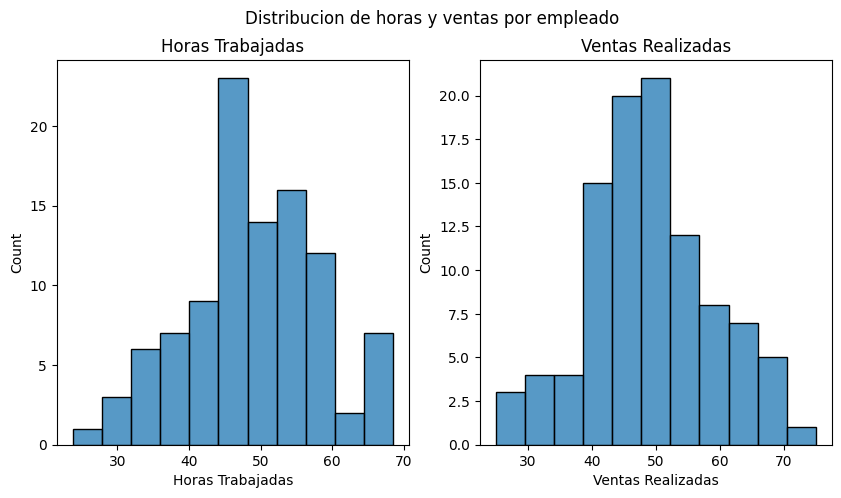

In [143]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax_flat = ax.flat

plt.suptitle("Distribucion de horas y ventas por empleado")
for column, ax in zip(["Horas Trabajadas","Ventas Realizadas"],ax_flat):
    ax.set_title(column)
    sns.histplot(data=rendimiento[column], ax=ax)

6. **Cálculo de la curtosis**:
   - Calcula la **curtosis** para ambos conjuntos de datos. ¿Los conjuntos tienen una curtosis positiva, negativa o son mesocúrticos? 
   - Explica qué implica esto sobre la forma de la distribución.

In [ ]:
rendimiento.kurt()

ID                  -1.200000
Horas Trabajadas    -0.100977
Ventas Realizadas    0.076791
dtype: float64

El coeficiente de curtosis para ambas variables sugiere que ambas están muy cerca de ser mesocúrticas. Las horas trabajadas presentarían una distribucion ligeramente platicúrtica, que significa que sus valores no se concentran tanto alrededor de su centro, mientras que lo contrario puede decirse de la Ventas Realizadas.

7. **Gráfico de dispersión**:
   - Crea un **gráfico de dispersión** entre **Horas Trabajadas** y **Ventas Realizadas**. 
   - ¿Hay alguna correlación entre ambas variables? Explica cómo interpretar la relación entre las dos variables.

<Axes: title={'center': 'Relacion entre horas trabajadas y ventas realizadas'}, xlabel='Horas Trabajadas', ylabel='Ventas Realizadas'>

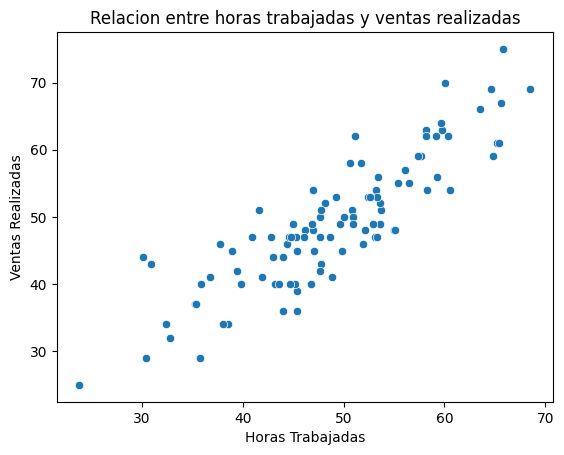

In [147]:
plt.title("Relacion entre horas trabajadas y ventas realizadas")
sns.scatterplot(data=rendimiento, x="Horas Trabajadas", y="Ventas Realizadas")

El gráfico de dispersión muestra una fuerte correlación lineal positiva, donde las ventas realizadas están estrechamente relacionadas con el número de horas realizadas. Consultado su coeficiente de correlación lineal de pearson, este confirma una fuerte correlación.

<Axes: >

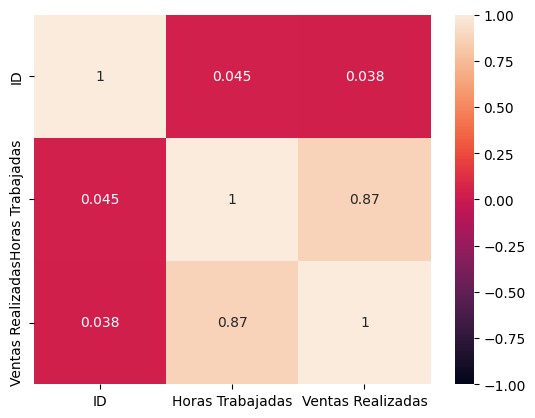

In [151]:
sns.heatmap(rendimiento.corr(),annot=True, vmin=-1,vmax=1)

8. **Análisis exploratorio completo**:
   - Realiza un análisis exploratorio detallado de los datos, incluyendo todas las medidas calculadas en los ejercicios anteriores. Presenta los resultados en forma de un informe claro y visual con gráficos y tablas que resuman las características clave de los datos.




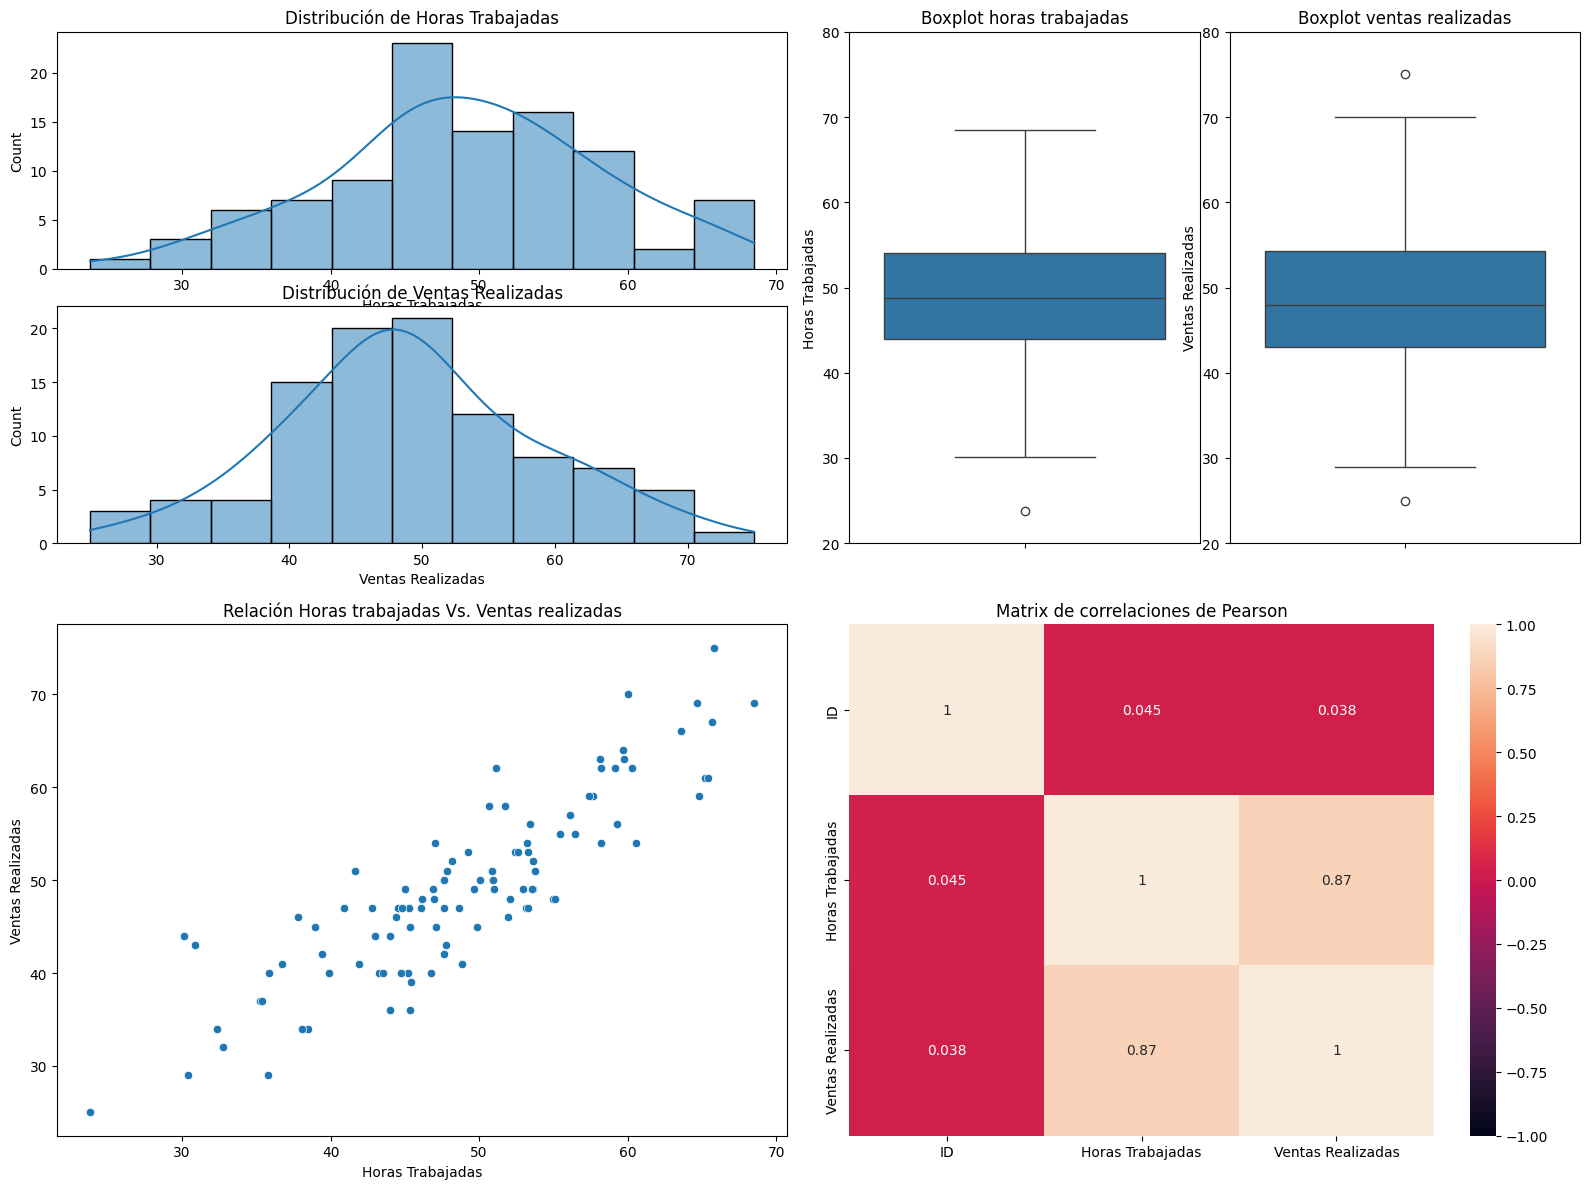

In [172]:
fig = plt.figure(figsize=(16, 12))
gs = gridspec.GridSpec(2, 2, figure=fig) 

# Primer subplot principal en la posición (0, 0)
gs0 = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[0, 0]) 
ax1 = fig.add_subplot(gs0[0, 0])
ax2 = fig.add_subplot(gs0[1, 0])

sns.histplot(rendimiento["Horas Trabajadas"], kde=True, ax=ax1)
ax1.set_title("Distribución de Horas Trabajadas")
sns.histplot(rendimiento["Ventas Realizadas"], kde=True, ax=ax2)
ax2.set_title("Distribución de Ventas Realizadas")

# Segundo subplot principal en la posición (0, 1)
gs1 = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs[0, 1])
ax3 = fig.add_subplot(gs1[0, 0])
ax4 = fig.add_subplot(gs1[0, 1])

sns.boxplot(y="Horas Trabajadas", data=rendimiento, ax=ax3)
ax3.set_title("Boxplot horas trabajadas")
ax3.set_ylim(20,80)
sns.boxplot(y="Ventas Realizadas", data=rendimiento, ax=ax4)
ax4.set_title("Boxplot ventas realizadas")
ax4.set_ylim(20,80)

# Tercer subplot principal en la posición (1, 0) (sin subdivisión)
ax5 = fig.add_subplot(gs[1, 0])
sns.scatterplot(x="Horas Trabajadas", y="Ventas Realizadas", data=rendimiento, ax=ax5)
ax5.set_title("Relación Horas trabajadas Vs. Ventas realizadas")


ax6 = fig.add_subplot(gs[1, 1])
sns.heatmap(rendimiento.corr(),annot=True, vmin=-1,vmax=1, ax=ax6)
ax6.set_title("Matrix de correlaciones de Pearson")


plt.tight_layout()
plt.show()
